## Breast cancer data _ PCA
 - 2,5,10 차원축소 _ 설명력 표현
 - PCA 전후 분류 비교 (Logistic Regression)

    - 위스콘신 유방암 예측 데이터 분류모델
    - sklearn dataset (data, feature, target 등 준비되어있어)
    - seaborn pairplot그리고 싶다면 pd.DataFrame 화 해야.
    - PCA객체 생성 처음 from sklearn.decomposition import PCA 챙기기

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer
br = load_breast_cancer()
# type(br)   ; 타입은 sklearn.utils.Bunch 
# 판다스 df 화 하지 않고. 정보를 조사해보면
# print(br.DESCR)
# br.feature_names
# br.target_names  : malignant 악성이 0 , 'benign 양성이 1 로 설정되어있어

In [4]:
# br.feature_names
br.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
# 피쳐셀렉트 없이 pairplot 돌리지 마요. 제 노트북은 6분 걸렸습니다...! 멈춰!
# pairplot은 df넣어줘야해서 오류날것. 
# df으로 넣어주면 잘 되지 않을까?
df  = pd.DataFrame(br.data, columns=br.feature_names)
# sns.pairplot(df)
# plt.show()

In [7]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
# 정규화 
from sklearn.datasets import load_breast_cancer
br = load_breast_cancer()

In [ ]:
from sklearn.preprocessing import StandardScaler
br_std = StandardScaler().fit_transform(br.data)
br_std[:3]

10, 5, 2 차원순으로 PCA 차원축소 후 설명력 도시

In [12]:
# PCA객체 생성
from sklearn.decomposition import PCA
pca10 = PCA(n_components=10)
br_pca10 = pca10.fit_transform(br_std)
pca10.explained_variance_ratio_, sum(pca10.explained_variance_ratio_)
# 95% 설명력 10 차원에 대해서. 

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
        0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978]),
 0.9515688143059359)

In [13]:
pca5 = PCA(n_components=5)
br_pca5 = pca5.fit_transform(br_std)
pca5.explained_variance_ratio_, sum(pca5.explained_variance_ratio_)
# 84% 설명력 5 차원에 대해서. 

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768]),
 0.8473427431679875)

In [14]:
pca2 = PCA(n_components=2)
br_pca2 = pca2.fit_transform(br_std)
pca2.explained_variance_ratio_, sum(pca2.explained_variance_ratio_)
# 63% 설명력 2 차원에 대해서. 

(array([0.44272026, 0.18971182]), 0.6324320765155941)

In [27]:
# pca10.explained_variance_ratio_, sum(pca10.explained_variance_ratio_)
# # 95% 설명력 10 차원에 대해서. 

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
        0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978]),
 0.9515688143328528)

In [19]:
# explained_variance_ratio
d = round(sum(pca10.explained_variance_ratio_),2)
f = round(sum(pca5.explained_variance_ratio_),2)
g = round(sum(pca2.explained_variance_ratio_),2)
print( f'pca 설명력 _ 10차원 : {d}%,  5차원 : {f}%,  2차원 : {g}%')

pca 설명력 _ 10차원 : 0.95%,  5차원 : 0.85%,  2차원 : 0.63%


* PCA전후 분류 비교

In [20]:
# PCA전후 분류비교 
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [34]:
# PCA전 원본데이터 
# 랜덤포레스트의 성능(score)를 accuracy라고 표현하면..??? 뭔가 안맞는듯.
X_train, X_test, y_train, y_test = train_test_split(
    br.data, br.target, stratify=br.target,  random_state=2021
)

rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
score = rfc.score(X_test, y_test)
print(f"PCA전 accuracy : {score:.2f}" )

PCA전 accuracy : 0.98


In [28]:
def pca_accuracy(X,y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=br.target,  random_state=2021
    )
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    return score  

In [31]:
for n in [10,5,2]:
    pca = PCA(n_components=n)
    br_pca = pca.fit_transform(br_std)
    explained = sum(pca.explained_variance_ratio_)
    acc = pca_accuracy(br_pca, br.target)
    print(f'PCA {n}: 설명력 {explained:.4f}, 정확도 {acc:.4f}')

PCA 10: 설명력 0.9516, 정확도 0.9650
PCA 5: 설명력 0.8473, 정확도 0.9650
PCA 2: 설명력 0.6324, 정확도 0.9441


####  cf, cell #### 

In [25]:
# # 10차원
# X_train, X_test, y_train, y_test = train_test_split(
#     br_pca10, br.target, stratify=br.target,  random_state=2021
# )

# rfc = RandomForestClassifier()
# rfc.fit(X_train, y_train)
# rfc.score(X_test, y_test)

0.972027972027972

In [26]:
# # 5차원
# X_train, X_test, y_train, y_test = train_test_split(
#     br_pca5, br.target, stratify=br.target,  random_state=2021
# )

# rfc = RandomForestClassifier()
# rfc.fit(X_train, y_train)
# rfc.score(X_test, y_test)

0.965034965034965

In [27]:
# # 2차원
# X_train, X_test, y_train, y_test = train_test_split(
#     br_pca2, br.target, stratify=br.target,  random_state=2021
# )

# rfc = RandomForestClassifier()
# rfc.fit(X_train, y_train)
# rfc.score(X_test, y_test)

0.9440559440559441

# 쌤과 함께. 그리고 로지스틱 회귀

     - 2, 5, 10 차원축소
     - 원본과 차원축소한 데이터의 분류 정확도 비교
     - 2차원 축소한 것은 시각화

In [8]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

- 데이터 로드 및 정규화 (PCA하려면 무조건)

In [30]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df= pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target
# df.target.value_counts()
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [31]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)
# cancer_std

- 차원축소

In [32]:
# 용재씨 질문 고민해볼것. 일단 2차원 차원축소.. 왜 정규화를 해야하는가?

# 어떤때 정규화를 하는지 보자. 정규화를 하는 의미 생각. 데이터를 스케일링 했을때의 이점. 
# PCA는 정규화가 필요할 수 밖에 없다



In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
cancer_pca = pca.fit_transform(cancer_std)
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

- PCA 전후 분류정확도 비교

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [35]:
# 원본 
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2021
)
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
acc = lrc.score(X_test, y_test)

In [36]:
acc # 어익후 100프로가 나왔네 

1.0

로지스틱 리그레서에서 원본데이터로 하려면 . 투덜투덜.
그래서 cancer_std로 하는것이고 만약 원본데이터로 하려면 max_iter키워야해. 
맥스 이터란 그라디언트 디센트 방식을 반복해서 몇번 수행할 것인가 . 

철민이형 직접답면 
안녕하십니까,

사이킷런이 upgrade되면서 LogisticRegression에서 solver에 따른 warning 메시지가 나오곤 합니다.

이 solver는  Gradient Descent와 같이 weight 값을 최적화 하는 유형들을 구분한 것입니다. max_iter는 Gradient Descent 방식을 반복해서 몇번 수행할 것인가 인데, 이게 일단 수렴(Convergence)하게 되면 횟수를 늘려도 성능이 거의 달라지지 않습니다.  따라서 500, 1000, 2000을 넣어도 일단 수렴이 된 후에 반복은 성능이 달라지지 않았기 때문에 같은 결과를 나타낸걸로 보시면 될 것 같습니다.

그리고 노트북성능은 실습 코드를 돌린 제 노트북은 2.5GHZ 이며 Memory는 8G입니다.

수행 속도가 느린것은 저도 원인을 모르겠습니다. 일단 max_iter가 5배 정도 증가했으니, 최대 5배 시간이 걸릴텐데, 한 12배 이상 시간이 걸리신것 같습니다. 혹 CPU 병렬이 차이가 있을 수도 있습니다.

제 노트북은 Physical 2 Core, 4 Thread입니다.  command 창에서 msinfo32 로 확인해 보실 수 있습니다.

In [37]:
# PCA
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2021
)
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
acc = lrc.score(X_test, y_test)
acc

0.9649122807017544

In [38]:
# 로지스틱 회귀의 pca 정확도 함수. 
def pca_accuracy(X,y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y,  random_state=2021, test_size=0.2
    )
    lrc = LogisticRegression()
    lrc.fit(X_train, y_train)
    acc = lrc.score(X_test, y_test)
    return acc

In [27]:
for n in [0, 2, 5, 10]:
    if n == 0:
        acc = pca_accuracy(cancer_std, cancer.target)
        print(f'원 데이터{acc:.4f}')
    else :
        pca = PCA(n_components=n)
        cancer_pca = pca.fit_transform(cancer_std)
        explained = sum(pca.explained_variance_ratio_)
        acc = pca_accuracy(cancer_pca, cancer.target)
        print(f'PCA {n}: , 정확도 {acc:.4f}, 설명력 {explained:.4f}')

원 데이터1.0000
PCA 2: , 정확도 0.9649, 설명력 0.6324
PCA 5: , 정확도 0.9912, 설명력 0.8473
PCA 10: , 정확도 0.9912, 설명력 0.9516


In [ ]:
# for n in [10,5,2]:
#     pca = PCA(n_components=n)
#     br_pca = pca.fit_transform(br_std)
#     explained = sum(pca.explained_variance_ratio_)
#     acc = pca_accuracy(br_pca, br.target)
#     print(f'PCA {n}: 설명력 {explained:.4f}, 정확도 {acc:.4f}')

PCA 10: 설명력 0.9516, 정확도 0.9650
PCA 5: 설명력 0.8473, 정확도 0.9650
PCA 2: 설명력 0.6324, 정확도 0.9441


In [ ]:
# 질문 n_components=가 None 라면?#  
# PCA(n_components=None)


- 시각화

In [29]:
# cancer_pca.shape

(569, 30)

In [44]:
pca = PCA(n_components=2)
cancer_pca = pca.fit_transform(cancer_std)
df['PC1'] = cancer_pca[:, 0]
df['PC2'] = cancer_pca[:, 1]

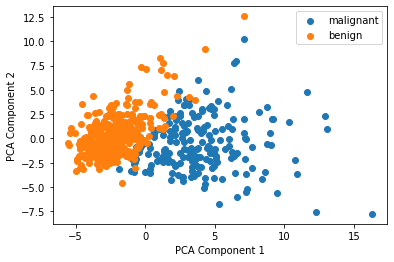

In [45]:
for i in range(2):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, label = cancer.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# markers = ['^', 's', 'o']
# for i, markers in enumerate(markers):
#     x_data = df[df.target == i]['PC1']
#     y_data = df[df.target == i]['PC2']
#     plt.scatter(x_data, y_data, marker = markers, label = wine.target_names[i])

# plt.legend()
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.show()